In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import numpy as np
import os
os.getcwd() 

'/Users/odiazib/csp_clang_bld_develop/TChem++/install/example/runs/PlugFlowReactor/CH4-PTnogas'

In [2]:
data = np.genfromtxt("PFRSolution.dat", dtype=str)
Header = (data[0,:]).tolist()
solTchem = (data[1:,:]).astype(np.float)

In [3]:
def makefigure3(x, y1, y2, y3, info, figure_name='TempDensVelPFR' ):
    
    label1 = info['label1']['label']
    label2 = info['label2']['label']
    label3 = info['label3']['label']
    
    ylabel1 = label1 + info['label1']['units']
    ylabel2 = info['label2']['units']
    
    fig = plt.figure()
    host = AA.Axes(fig, [0.1, 0.1, 0.8, 0.8]) 
    fig.add_axes(host)

    par1 = host.twinx()

    host.set_xlabel("Position [m]x1e-2")
    host.set_ylabel(ylabel1)
    par1.set_ylabel(ylabel2)

    p1 = host.plot(x, y1,'r-', label=label1)
    p2 = par1.plot(x, y2,'b-', label=label2)
    p3 = par1.plot(x, y3,'g-', label=label3)

    loc_x = info['loc_x']
    loc_y = info['loc_y']
    
    par1.set_xlim(info['xlim'])

    # added these three lines
    lns = p1+p2+p3
    labs = [l.get_label() for l in lns]
    host.legend(lns, labs, bbox_to_anchor=(loc_x, loc_y),frameon=False)

    inset = AA.Axes(fig, [info['inset_x1'], info['inset_y1'], info['inset_x2'], info['inset_y2']]) 
    fig.add_axes(inset)
    inset.plot(x, y1,'r.-')
    inset.set_yticks([])
    par2 = inset.twinx()
    par2.set_yticks([])
    par2.plot(x, y2,'b.-')
    par2.plot(x, y3,'g.-')

    inset.set_xlim(info['xlim2'])
    
    mark_inset(host, inset, loc1=2, loc2=4, fc="none", ec="0.75")
        
    plt.xticks(visible=False)
    plt.yticks(visible=False)
    
    plt.savefig(figure_name,bbox_inches='tight')
    return 

In [4]:
def makePlot(x, y1, y2, y3, info, fig_name):
    loc_x = info['loc_x']
    loc_y = info['loc_y']
    
    ys1 = info['label1']['scale']
    ys2 = info['label2']['scale']
    ys3 = info['label3']['scale']
    
    label1 = info['label1']['label'] + ' x'+str(ys1)
    label2 = info['label2']['label'] + ' x'+str(ys2)
    label3 = info['label3']['label'] + ' x'+str(ys3)
    
    fig, ax = plt.subplots(figsize=[5,4])
    p1 = ax.plot(x, y1/ys1,'r-',label = label1)
    p2 = ax.plot(x, y2/ys2,'g-',label = label2)
    p3 = ax.plot(x, y3/ys3,'b-',label = label3)
    plt.xlabel(info['xlabel'])
    plt.ylabel(info['ylabel'])
    
    plt.xlim(info['xlim'])
    plt.ylim(info['ylim'])
    
    
    axins = zoomed_inset_axes(ax, info['zoom_scale'], loc =1) # zoom = 2
    axins.plot(x,y1/ys1,'r.-')
    axins.plot(x,y2/ys2,'g.-')
    axins.plot(x,y3/ys3,'b.-')
    
    # sub region of the original image
    x1, x2, y1s, y2s = info['zoom']#0.0042, 0.0052, 0.0, 0.3
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1s, y2s)
    # added these three lines
    lns = p1+p2+p3
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, bbox_to_anchor=(loc_x, loc_y),frameon=False)
    
    
    plt.xticks(visible=False)
    plt.yticks(visible=False)
    
    # draw a bbox of the region of the inset axes in the parent axes and
    # connecting lines between the bbox and the inset axes area
    mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.75")
    plt.draw()
    plt.savefig(fig_name,bbox_inches='tight')
    
    return

In [5]:
def makePlotV2(x, y1, y2, y3, info, fig_name):
    loc_x = info['loc_x']
    loc_y = info['loc_y']
    
    ys1 = info['label1']['scale']
    ys2 = info['label2']['scale']
    ys3 = info['label3']['scale']
    
    label1 = info['label1']['label'] + ' x'+str(ys1)
    label2 = info['label2']['label'] + ' x'+str(ys2)
    label3 = info['label3']['label'] + ' x'+str(ys3)
    
    fig, ax = plt.subplots(figsize=[5,4])
    p1 = ax.plot(x, y1/ys1,'r-',label = label1)
    p2 = ax.plot(x, y2/ys2,'g-',label = label2)
    p3 = ax.plot(x, y3/ys3,'b-',label = label3)
    plt.xlabel(info['xlabel'])
    plt.ylabel(info['ylabel'])
    
    plt.xlim(info['xlim'])
    plt.ylim(info['ylim'])
    
    
#     axins = zoomed_inset_axes(ax, info['zoom_scale'], loc =1) # zoom = 2
    
    axins = ax.inset_axes(info['loc_zoom'])
#     axins = ax.inset_axes(ax, 1,1 , loc=2,bbox_to_anchor=(0.2, 0.55),bbox_transform=ax.figure.transFigure)
    axins.plot(x,y1/ys1,'r.-')
    axins.plot(x,y2/ys2,'g.-')
    axins.plot(x,y3/ys3,'b.-')
    
    # sub region of the original image
    x1, x2, y1s, y2s = info['zoom']
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1s, y2s)
    axins.set_yticks([])
    axins.set_xticks([])
    # added these three lines
    lns = p1+p2+p3
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, bbox_to_anchor=(loc_x, loc_y),frameon=False)
    
    
#     axins.xticks(visible=False)
#     axins.yticks(visible=False)
    
    # draw a bbox of the region of the inset axes in the parent axes and
    # connecting lines between the bbox and the inset axes area
    mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.75")
    plt.draw()
    plt.savefig(fig_name,bbox_inches='tight')
    
    return



In [6]:
print(Header)

['iter', 't', 'dt', 'Density[kg/m3]', 'Pressure[Pascal]', 'Temperature[K]', 'N2', 'AR', 'HE', 'NE', 'CH4(2)', 'O2(3)', 'NO(4)', 'H2(5)', 'H2O(11)', 'CO2(12)', 'CO(14)', 'OH(D)(27)', 'H(32)', 'NO2J(49)', 'HO2(72)', 'X(1)', 'HX(6)', 'OX(7)', 'CH3X(8)', 'HOX(9)', 'H2OX(10)', 'CO2X(13)', 'OCX(15)', 'CX(16)', 'CH2X(17)', 'CHX(18)', 'CH4X(19)', 'NOX(20)', 'NO2X(21)', 'HO2X(28)', 'CHOX(45)', 'CHO2X(46)', 'COX(47)', 'H2X(48)', 'NO2X(59)', 'velocity[m/s]']


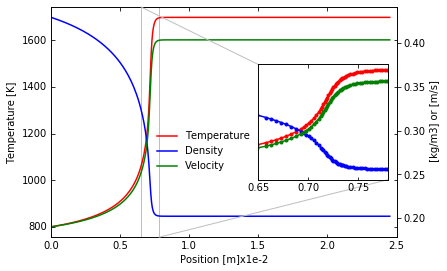

In [7]:
info={}
info['label1'] = {'label':'Temperature','units':' [K]'}
info['label2'] = {'label':'Density','units':' [kg/m3] or [m/s]'}
info['label3'] = {'label':'Velocity','units':' [m/s]x1e-2'}
info['loc_x'] = 0.28
info['loc_y'] = 0.5
info['xlim'] = [0.,0.025*1e2]
info['xlim2'] = [0.65,0.78]
info['inset_x1'] = 0.58
info['inset_y1'] = 0.3
info['inset_x2'] = 0.3
info['inset_y2'] = 0.4
x  = solTchem[:,Header.index('t')]
y1 = solTchem[:,Header.index('Temperature[K]')]
y2 = solTchem[:,Header.index('Density[kg/m3]')]
y3 = solTchem[:,Header.index('velocity[m/s]')]
makefigure3(x*100, y1, y2, y3*1e2, info, figure_name='TempDensVelPFR.pdf')

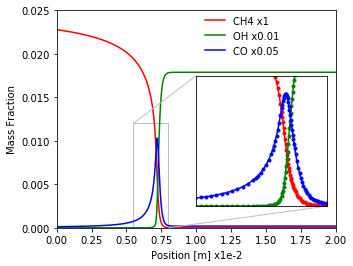

In [8]:
info={}
info['xlabel'] = 'Position [m] x1e-2'
info['ylabel'] = 'Mass Fraction'
info['zoom'] = [0.55, 0.8, 0.0, 0.012]
info['loc_x'] = 0.5
info['loc_y'] = 0.75
info['zoom_scale'] = 3
info['xlim'] = [0.,0.02*100]
info['ylim'] = [0.,0.025]
info['loc_zoom'] = [0.5, 0.1, 0.47, 0.6]
info['label1'] = {'label':'CH4','scale':1}
info['label2'] = {'label':'OH','scale':1e-2}
info['label3'] = {'label':'CO','scale':5e-2}
y1 = solTchem[:,Header.index('CH4(2)')]
y2 = solTchem[:,Header.index('OH(D)(27)')]
y3 = solTchem[:,Header.index('CO(14)')]

makePlotV2(x*100, y1, y2, y3, info, 'gas1.pdf')

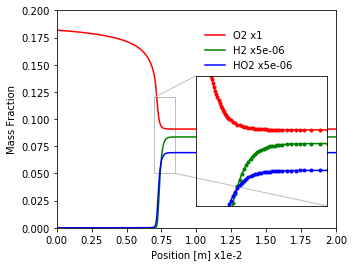

In [9]:
info={}
info['label1'] = {'label':'O2','scale':1}
info['label2'] = {'label':'H2','scale':5e-6}
info['label3'] = {'label':'HO2','scale':5e-6}
info['xlabel'] = 'Position [m] x1e-2'
info['ylabel'] = 'Mass Fraction'
info['zoom'] = [0.7, 0.85, 0.05, 0.12]
info['loc_x'] = 0.5
info['loc_y'] = 0.95
info['zoom_scale'] = 1.5
info['xlim'] = [0.,0.02*100]
info['ylim'] = [0.,0.2]
info['loc_zoom'] = [0.5, 0.1, 0.47, 0.6]

y1 = solTchem[:,Header.index('O2(3)')]
y2 = solTchem[:,Header.index('H2(5)')]
y3 = solTchem[:,Header.index('HO2(72)')]
makePlotV2(x*100, y1, y2, y3, info, 'gas2.pdf')

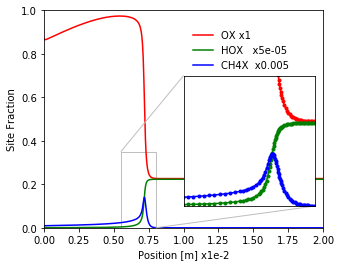

In [10]:
info={}
info['label1'] = {'label':'OX','scale':1}
info['label2'] = {'label':'HOX  ','scale':5e-5}
info['label3'] = {'label':'CH4X ','scale':5e-3}
info['xlabel'] = 'Position [m] x1e-2'
info['ylabel'] = 'Site Fraction'
info['zoom'] = [0.55, 0.8, 0.0, 0.35]
info['loc_zoom'] = [0.5, 0.1, 0.47, 0.6]
info['loc_x'] = 0.5
info['loc_y'] = 0.95
# info['zoom_scale'] = 10
info['xlim'] = [0.,0.02*100]
info['ylim'] = [0.,1]
x  = solTchem[:,Header.index('t')]
y1 = solTchem[:,Header.index('OX(7)')]
y2 = solTchem[:,Header.index('HOX(9)')]
y3 = solTchem[:,Header.index('CH4X(19)')]

makePlotV2(x*100, y1, y2, y3, info, 'surf2.pdf')

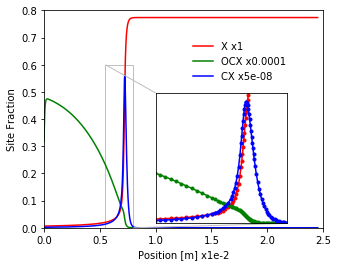

In [11]:
info={}
scale =100
info['label1'] = {'label':'X','scale':1}
info['label2'] = {'label':'OCX','scale':1e-4}
info['label3'] = {'label':'CX','scale':5e-8}
info['xlabel'] = 'Position [m] x1e-2'
info['ylabel'] = 'Site Fraction'
info['zoom'] = [0.55, 0.8, 0.0, 0.6]
info['loc_zoom'] = [0.5, 0.1, 0.47, 0.6]
info['loc_x'] = 0.5
info['loc_y'] = 0.9
info['zoom_scale'] = 2.3
info['xlim'] = [0.,0.025*scale]
info['ylim'] = [0.,0.8]
info['loc_zoom'] = [0.4, 0.02, 0.47, 0.6]

y1 = solTchem[:,Header.index('X(1)')]
y2 = solTchem[:,Header.index('OCX(15)')]
y3 = solTchem[:,Header.index('CX(16)')]
# makePlot(x, y1, y2, y3, info, "surf1.pdf")
makePlotV2(x*scale, y1, y2, y3, info, 'surf1.pdf')

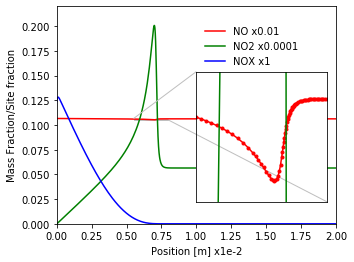

In [12]:
info={}
info['label1'] = {'label':'NO','scale':1e-2}
info['label2'] = {'label':'NO2','scale':1e-4}
info['label3'] = {'label':'NOX','scale':1}
info['xlabel'] = 'Position [m] x1e-2'
info['ylabel'] = 'Mass Fraction/Site fraction'
info['zoom'] = [0.55, 0.8, 0.105, 0.1065]
info['loc_x'] = 0.5
info['loc_y'] = 0.95
info['zoom_scale'] = 1.5
info['xlim'] = [0.,0.02*100]
info['ylim'] = [0.,0.22]
info['loc_zoom'] = [0.5, 0.1, 0.47, 0.6]

y1 = solTchem[:,Header.index('NO(4)')]
y2 = solTchem[:,Header.index('NO2J(49)')]
y3 = solTchem[:,Header.index('NOX(20)')]
makePlotV2(x*100, y1, y2, y3, info, 'surfgas1.pdf')